In [117]:
! pip3 install wordcloud

You are using pip version 19.0.3, however version 21.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [119]:
import plotly.graph_objs as go
import plotly
import plotly.express as px
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import collections
import seaborn as sns
from wordcloud import WordCloud
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)

dataframe = pd.read_csv("data.csv")

complementary_colors = ["#694489", "#604e70", "#894487", "#474489", "#855aaa", "#c792ea", "#614bcc"]


In [97]:

x=['Winter', 'Spring', 'Summer', 'Fall']

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x, y=[40, 60, 40, 10],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5, color='rgb(131, 90, 241)'),
    stackgroup='one' # define stack group
))
fig.add_trace(go.Scatter(
    x=x, y=[20, 10, 10, 60],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5, color='rgb(111, 231, 219)'),
    stackgroup='one'
))
fig.add_trace(go.Scatter(
    x=x, y=[40, 30, 50, 30],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5, color='rgb(184, 247, 212)'),
    stackgroup='one'
))

fig.update_layout(yaxis_range=(0, 100))
fig.show()

In [75]:


# create list of column names to iterate through
columns = ["Where did you work for your 1st coop ?", "Where did you work for your 2nd coop ?", "Where did you work for your 3rd coop ?", "Where did you work for your 4th coop ?", "Where did you work for your 5th coop ?", "Where did you work for your 6th coop ? (Even if it was remote, you can just put in the location of where you would have worked if COVID never happened)"]
cities = ["Toronto", "GTA (Outside of Toronto)", "Ottawa", "Windsor", "Vancouver", "KW", "Other Ontario", "Montreal", "New York City", "SF / Bay Area", "Seattle", "Boston", "Los Angeles", "Other USA", "Other Canada","UK","Germany","Anywhere (E-Coop)","Remote"]
# "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])

colors_1 = sns.color_palette("husl", 20)
#colors_1 = sns.color_palette("Paired", 20)



dist = collections.defaultdict(list)

for city in cities:
    dist[city] = [0,0,0,0,0,0]

for i in range(len(columns)):
    column = columns[i]
    values = dataframe[column][9:].value_counts()
    for city, freq in values.items():
        dist[city][i] = freq

x = ["1st co-op", "2nd co-op", "3rd co-op", "4th co-op", "5th co-op", "6th co-op"]
fig = go.Figure()

i = 0
for city, freq in dist.items():
    fig.add_trace(go.Scatter(
        x=x, y=freq,
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.7, color='rgb' + str(colors_1[i])),
        stackgroup='one',
        name=city
    ))
    i+=1

fig.update_layout(yaxis_range=(0, 45))
fig.update_layout(width=1500, height=1000)
fig.show()


defaultdict(<class 'int'>, {'Process Improvement Analyst': 1, 'Software Tester': 2, 'Machine Learning Engineer': 3, 'Production Control Specialist': 1, 'Business Analyst': 11, 'Product Coordinator': 1, 'Technical Project Lead': 1, 'Continuous Improvement Analyst': 2, 'Delivery Coordinator': 1, 'Product Manager': 25, 'Program Manager': 4, 'Devops Engineer': 1, 'Site Reliability Engineer': 1, 'Cybersecurity Consultant': 1, 'Software Developer': 19, 'Business Systems Analyst': 1, 'Agile Coach': 1, 'Data Analyst': 8, 'IT Operations Analyst': 1, 'Data Analytics Consultant': 1, 'Quantitative Researcher': 1, 'Technical Program Manager': 2, 'Technical Account Manager': 1, 'Project Engineering Intern': 1, 'Project Analyst': 1, 'Project Manager': 8, 'Strategic Sourcing Analyst': 1, 'Business Intelligence Intern': 1, 'IoT Engineer': 1, 'Data Analytics Intern': 1, 'Data Scientist': 3, 'Data Scientist ': 1, 'Project Coordinator': 2, 'Sales Representative': 1, 'Change Management Intern': 1, 'Busines

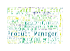

In [143]:
data = pd.read_csv("job titles.csv")
column = data["Job Titles"]
dist = collections.defaultdict(int)

colors = sns.color_palette("husl", 96)
sentence = ""

for i, line in column.iteritems():
    # split line into tokens (comma separated)
    ll = line.split(", ")
    for token in ll:
        dist[token] += 1
print(dist)



from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(background_color='white', width = 3000, height = 2000)
wordcloud.generate_from_frequencies(frequencies=dist)
plt.figure(figsize=(30,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
